In this notebook, we'll solve a system of two ODEs both numerically and analytically, noting how the solutions depend on the eigenvalues of the dynamics matrix. The dynamical equations are
$$
\frac{d\vec{x}}{dt} = \mathbf{A} \vec{x},
$$
and we assume that we are given the initial condition $\vec{x}(0)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, we can define the dynamics matrix $\mathbf{A}$ and compute the eigenvalues:

In [63]:
A = np.array([[-1, 1],
              [2, -3]])

evals, evecs = np.linalg.eig(A)
print('Evals: ', evals)

# Period of oscillations if evals are complex:
if np.imag(evals[0]) != 0:
    print('Period of oscillations: ', 2 * np.pi / np.imag(evals[0]))

# Check that T (the matrix of eigenvectors) diagonalizes A:
T = evecs
print('Diagonalized dynamics matrix: ', np.linalg.inv(T) @ A @ T)



Evals:  [-0.26794919 -3.73205081]
Diagonalized dynamics matrix:  [[-2.67949192e-01  6.93889390e-17]
 [-2.22044605e-16 -3.73205081e+00]]


Next, we can solve the ODEs numerically using Euler integration:

Text(0.5, 1.0, 'Numerical solution')

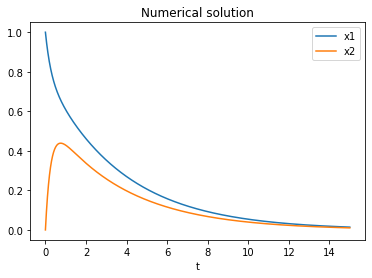

In [29]:
dt = 0.01
t_max = 15
n_timesteps = int(t_max / dt)
t_range = np.linspace(0, t_max, n_timesteps)

# Solve the ODE numerically with Euler integration:
x = np.zeros((n_timesteps, 2))
x[0,:] = [1, 0]
for n in range(n_timesteps-1):
    x[n+1,:] = x[n,:] + dt * A @ x[n,:]
    
plt.plot(t_range, x[:,0])
plt.plot(t_range, x[:,1])
plt.legend(['x1', 'x2'])
plt.xlabel('t')
plt.title('Numerical solution')

**Exercise**: Compute the analytic solution $\vec{x}(t) = e^{\mathbf{A} t} \vec{x}(0)$. Plot the result and compare it with the numerical solution computed above.

Text(0.5, 1.0, 'Theoretical solution')

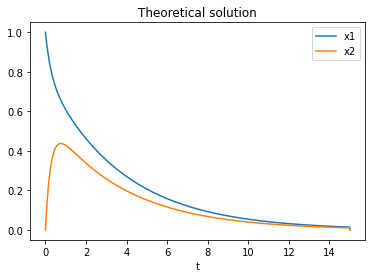

In [30]:
from scipy.linalg import expm  # This function takes the matrix exponential

## Solution ##

# Compute and plot the analytic solution to the ODE:
x_pred = np.zeros((n_timesteps, 2))
x_pred[0,:] = [1, 0]
for n in range(n_timesteps-1):
    x_pred[n,:] = expm(A * t_range[n]) @ x_pred[0,:]
        
plt.plot(t_range, x_pred[:,0])
plt.plot(t_range, x_pred[:,1])
plt.legend(['x1', 'x2'])
plt.xlabel('t')
plt.title('Theoretical solution')

In [67]:
# Note that the matrix exponential is different from the exponential applied elementwise:
print('A: \n', A)
print('Matrix exponential of A: \n', expm(A))
print('Elementwise exponential of A: \n', np.exp(A))

A: 
 [[-1  1]
 [ 2 -3]]
Matrix exponential of A: 
 [[0.60835429 0.21390913]
 [0.42781826 0.18053603]]
Elementwise exponential of A: 
 [[0.36787944 2.71828183]
 [7.3890561  0.04978707]]


**Exercise**: Plot the solution as a trajectory in state space, together with the eigenvectors.

(-1.0, 1.0)

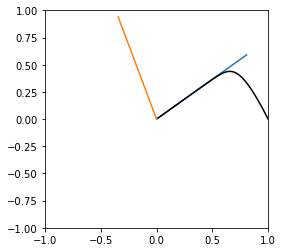

In [64]:
## Solution ##

# Plot the trajectory in state space:
plt.figure(figsize=(4,4))
plt.plot([0, evecs[0,0]], [0, evecs[1,0]])
plt.plot([0, evecs[0,1]], [0, evecs[1,1]])
plt.plot(x[:,0], x[:,1], 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)

**Exercise**: Recall from class that we can project $x$ onto the eigenvectors of $\mathbf{A}$ by defining $\vec{z}(t) = \mathbf{T} \vec{x}(t)$. Plot the projections $z_{1,2}(t)$ as functions of time. Also plot them in 

Text(0.5, 0, 't')

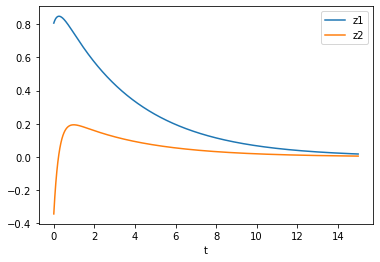

In [65]:
## Solution ##

z = x @ T  # It's x @ T rather than T @ x since the first index of x corresponds to time
plt.plot(t_range, z[:,0])
plt.plot(t_range, z[:,1])
plt.legend(['z1', 'z2'])
plt.xlabel('t')
